In [6]:

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

df = pd.read_csv("/content/drive/My Drive/mobilenetv2_features.csv")

## Always perform EDA

In [ ]:
df

,filename,split,label,feature0,feature1,feature2,feature3,feature4,feature5,feature6,...,feature1270,feature1271,feature1272,feature1273,feature1274,feature1275,feature1276,feature1277,feature1278,feature1279
0,10253_idx5_x1001_y1001_class0.png,training,0,0.167900,0.626348,0.024544,0.000000,0.000000,0.000000,0.120590,...,0.101287,0.073636,0.000000,0.000000,0.000000,0.007607,0.070847,0.000000,0.082813,1.970451
1,10253_idx5_x1001_y1051_class0.png,training,0,0.000000,1.009493,0.000000,0.000000,0.000000,0.000000,0.339437,...,0.000000,0.000000,0.076855,0.004337,0.123039,0.009992,0.000000,0.000000,0.204901,2.269278
2,10253_idx5_x1001_y1101_class0.png,training,0,0.008274,0.874777,0.007049,0.000000,0.054652,0.161319,0.369927,...,0.638897,0.000000,0.309571,0.001776,2.318480,0.041517,0.458526,0.000000,0.009216,1.173844
3,10253_idx5_x1001_y1151_class0.png,training,0,0.006460,1.002943,0.013057,0.000000,0.016297,0.000000,0.927690,...,0.438004,0.029567,0.797129,0.235389,2.728084,0.018930,0.000000,0.000000,0.000000,0.625935
4,10253_idx5_x1001_y1201_class0.png,training,0,0.000000,0.603440,0.000000,0.011411,0.008121,0.101946,0.000000,...,2.301436,0.004620,1.208042,0.104392,0.044177,0.079221,0.000000,0.011444,0.266688,1.833230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31103,10288_idx5_x2001_y251_class1.png,testing,1,0.712008,0.293049,0.000000,0.000000,0.731829,0.000000,2.209924,...,0.169198,0.205379,0.246734,0.031348,0.000000,0.041069,0.010315,0.000000,1.216262,3.750439
31104,10288_idx5_x2001_y451_class1.png,testing,1,0.000000,0.292149,0.000000,0.000000,0.112737,0.000000,0.195201,...,0.000000,0.000000,0.066128,0.263483,0.029558,0.044128,0.000000,0.000000,0.870115,2.848645
31105,10288_idx5_x2051_y301_class1.png,testing,1,0.000000,0.750592,0.000000,0.000000,0.094488,0.082299,0.249254,...,0.000000,0.219395,0.005729,0.000000,0.638050,0.227719,0.000000,0.541448,0.000000,1.227346
31106,10288_idx5_x2101_y151_class1.png,testing,1,0.072217,0.000000,0.000000,0.000000,0.000000,0.000000,0.035526,...,0.000000,0.014195,0.000000,0.097516,0.000000,0.006829,0.218174,0.032910,0.159909,2.213188


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31108 entries, 0 to 31107
Columns: 1283 entries, filename to feature1279
dtypes: float64(1280), int64(1), object(2)
memory usage: 304.5+ MB


In [ ]:
print(df.select_dtypes(include="object").columns)


Index(['filename', 'split'], dtype='object')


In [ ]:
X = df.drop(columns=["filename", "label", "split"])
y = df["label"]


## Implementation of basic model. Random Forest Classifier is effective for datasets with many features, as it handles high-dimensional data well and reduces overfitting through ensemble learning."

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      4894
           1       0.80      0.45      0.58      1328

    accuracy                           0.86      6222
   macro avg       0.83      0.71      0.75      6222
weighted avg       0.85      0.86      0.84      6222



Confusion matrix for the same

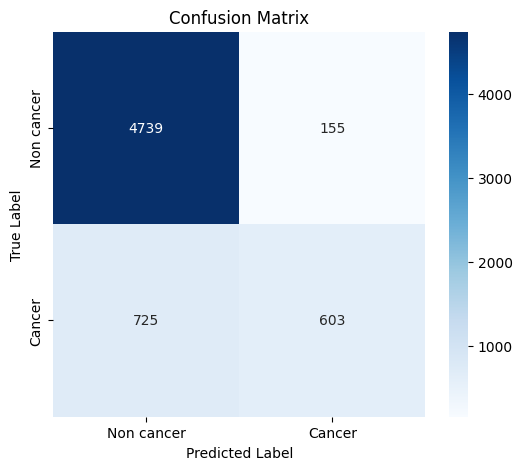

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

class_names = ["Non cancer", "Cancer"]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## The data is skewed beause there are more non cancerous chekups than cancerous. But how unbalanced it is, will be seen via this code

In [12]:
class_counts = df['label'].value_counts()

print(" Class Distribution:")
print(f"Non-Cancerous (0): {class_counts.get(0, 0)}")
print(f"Cancerous     (1): {class_counts.get(1, 0)}")

 Class Distribution:
Non-Cancerous (0): 24469
Cancerous     (1): 6639


## As seen, data classes are highly unbalanced. Hence, we'll use SMOTE, whoch synthetically creates more examples of the minority clas

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4894
           1       0.93      0.93      0.93      4894

    accuracy                           0.93      9788
   macro avg       0.93      0.93      0.93      9788
weighted avg       0.93      0.93      0.93      9788



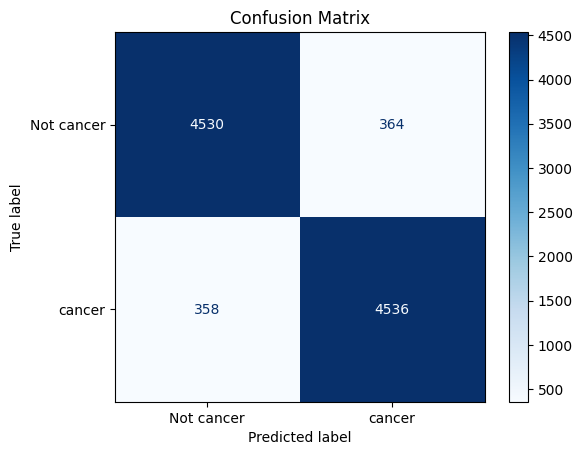

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, stratify=y_resampled, test_size=0.2)

model = RandomForestClassifier(n_estimators=150, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


labels = ["Not cancer", "cancer"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


The default threshold to classify data as of category 1 or 2 is dependent on what the model predicts it to be on a range of 0 to 1. Generally for binary classification, the division of class range is at 0.5. Anything below is one class and anything above is another class. Since our data is skewed, the model will more likely predict most of the data it recieves to belong to majority class ( Non cancerous class). Hence, we will lower the threshold so that those images for which model is less sure about, mostly the minority cases, can get labelled more accurately.

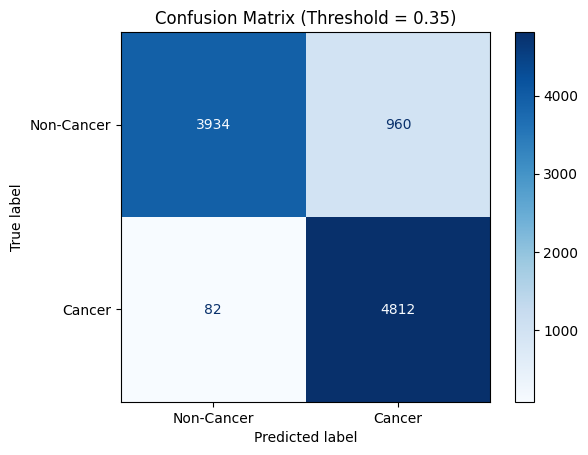


Classification Report (Threshold = 0.35):

              precision    recall  f1-score   support

  Non-Cancer       0.98      0.80      0.88      4894
      Cancer       0.83      0.98      0.90      4894

    accuracy                           0.89      9788
   macro avg       0.91      0.89      0.89      9788
weighted avg       0.91      0.89      0.89      9788



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# for predictinng probabilities of the positive class (Cancer)
y_proba = model.predict_proba(X_test)[:, 1]

# custom threshold
threshold = 0.35
y_pred_custom = (y_proba >= threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_custom)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Cancer', 'Cancer'])
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix (Threshold = {threshold})")
plt.show()

# STEP 4: Classification report
print(f"\nClassification Report (Threshold = {threshold}):\n")
print(classification_report(y_test, y_pred_custom, target_names=['Non-Cancer', 'Cancer']))


## As we can see above, even though the overall accuracy dropped, false negatives have significantly decreased. It's very important that people at risk are correcty identified so they can recieve tratement asap. Flase positivies have spiked, but they are still less of a concern since its not life threatening

## Balancing weights via smote and custom threshold

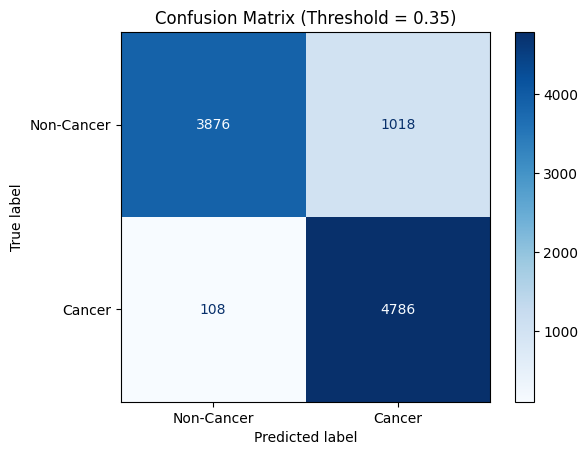


Classification Report (Threshold = 0.35):

              precision    recall  f1-score   support

  Non-Cancer       0.97      0.79      0.87      4894
      Cancer       0.82      0.98      0.89      4894

    accuracy                           0.88      9788
   macro avg       0.90      0.88      0.88      9788
weighted avg       0.90      0.88      0.88      9788



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)
from imblearn.over_sampling import SMOTE

# smote for class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    stratify=y_resampled,
    random_state=42
)

model = RandomForestClassifier(
    n_estimators=150,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train, y_train)

# custom threshold
threshold = 0.35
y_proba = model.predict_proba(X_test)[:, 1]
y_pred_custom = (y_proba >= threshold).astype(int)


cm = confusion_matrix(y_test, y_pred_custom)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Non-Cancer', 'Cancer']
)
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix (Threshold = {threshold})")
plt.show()


print(f"\nClassification Report (Threshold = {threshold}):\n")
print(classification_report(
    y_test,
    y_pred_custom,
    target_names=['Non-Cancer', 'Cancer']
))


## Xgboost with custom threshold because the former is a more powerful and flexible ml algo

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:27:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


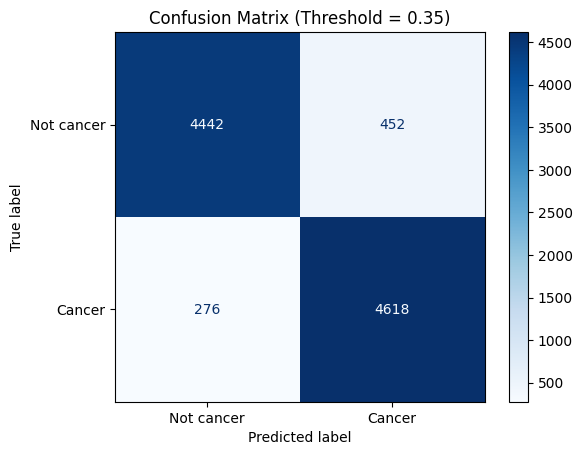


Classification Report (Threshold = 0.35):

              precision    recall  f1-score   support

  Not cancer       0.94      0.91      0.92      4894
      Cancer       0.91      0.94      0.93      4894

    accuracy                           0.93      9788
   macro avg       0.93      0.93      0.93      9788
weighted avg       0.93      0.93      0.93      9788



In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    precision_score, recall_score, f1_score, accuracy_score
)
from xgboost import XGBClassifier

# for training with xbgoost
model = XGBClassifier(
    n_estimators=150,
    scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
model.fit(X_train, y_train)

# for probability
y_proba = model.predict_proba(X_test)[:, 1]

threshold = 0.35
y_pred_custom = (y_proba >= threshold).astype(int)

labels = ["Not cancer", "Cancer"]
cm = confusion_matrix(y_test, y_pred_custom)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (Threshold = {threshold})")
plt.show()


print(f"\nClassification Report (Threshold = {threshold}):\n")
print(classification_report(y_test, y_pred_custom, target_names=labels))


## Checking to see if custom threshold + xbg boost + smote can yield even better results

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:30:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


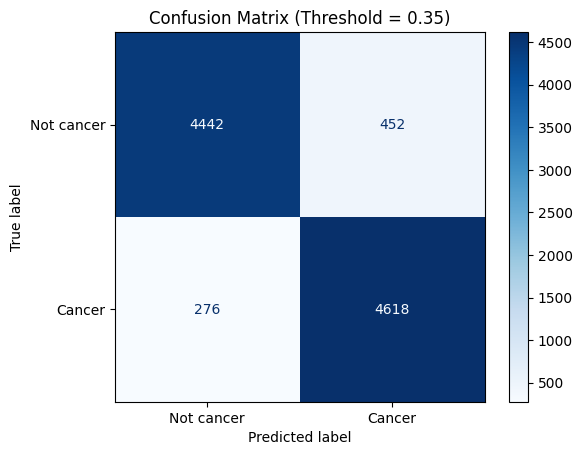


Classification Report (Threshold = 0.35):

              precision    recall  f1-score   support

  Not cancer       0.94      0.91      0.92      4894
      Cancer       0.91      0.94      0.93      4894

    accuracy                           0.93      9788
   macro avg       0.93      0.93      0.93      9788
weighted avg       0.93      0.93      0.93      9788



In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


# smote
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# smote + xbg
model = XGBClassifier(
    n_estimators=150,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
model.fit(X_train, y_train)


y_proba = model.predict_proba(X_test)[:, 1]

# smote+xbg+custom threshold
threshold = 0.35
y_pred_custom = (y_proba >= threshold).astype(int)

labels = ["Not cancer", "Cancer"]
cm = confusion_matrix(y_test, y_pred_custom)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (Threshold = {threshold})")
plt.show()

print(f"\nClassification Report (Threshold = {threshold}):\n")
print(classification_report(y_test, y_pred_custom, target_names=labels))


## For saving the now trained model such that it can be applied

In [15]:
with open('cancer_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ Model trained and saved successfully!")

✅ Model trained and saved successfully!


## For testing data provided by user

Saving imagesk.jpg to imagesk (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


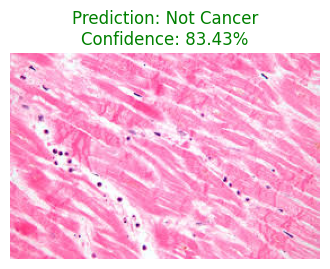

In [16]:
import io
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pickle
from google.colab import files

import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model

# Loading model
model = pickle.load(open("cancer_model.pkl", "rb"))

#  Upload the image
uploaded = files.upload()

# Loop through uploaded files
for filename in uploaded.keys():
    # preprocessing the image
    img = Image.open(io.BytesIO(uploaded[filename])).convert("RGB")
    img_resized = img.resize((224, 224))
    img_array = img_to_array(img_resized)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    #  Load MobileNetV2 without top layer + global average pooling
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    feature_extractor = Model(inputs=base_model.input, outputs=x)
    features = feature_extractor.predict(img_array).flatten()

    # prediction
    y_proba = model.predict_proba([features])[0]
    threshold = 0.35
    prediction = 1 if y_proba[1] >= threshold else 0
    confidence_score = y_proba[1] if prediction == 1 else y_proba[0]

    #  image with caption
    plt.figure(figsize=(4, 4))
    img_display = np.array(img)
    plt.imshow(img_display)
    plt.axis('off')

    label = 'Cancer' if prediction == 1 else 'Not Cancer'
    color = 'red' if prediction == 1 else 'green'
    plt.title(f"Prediction: {label}\nConfidence: {confidence_score*100:.2f}%", fontsize=12, color=color)
    plt.show()
